# 모듈 및 데이터 로딩

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
data = pd.read_csv('./ecommerce.csv')

In [4]:
data.shape

(500, 8)

In [5]:
data.head(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505


In [6]:
data.tail(3)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


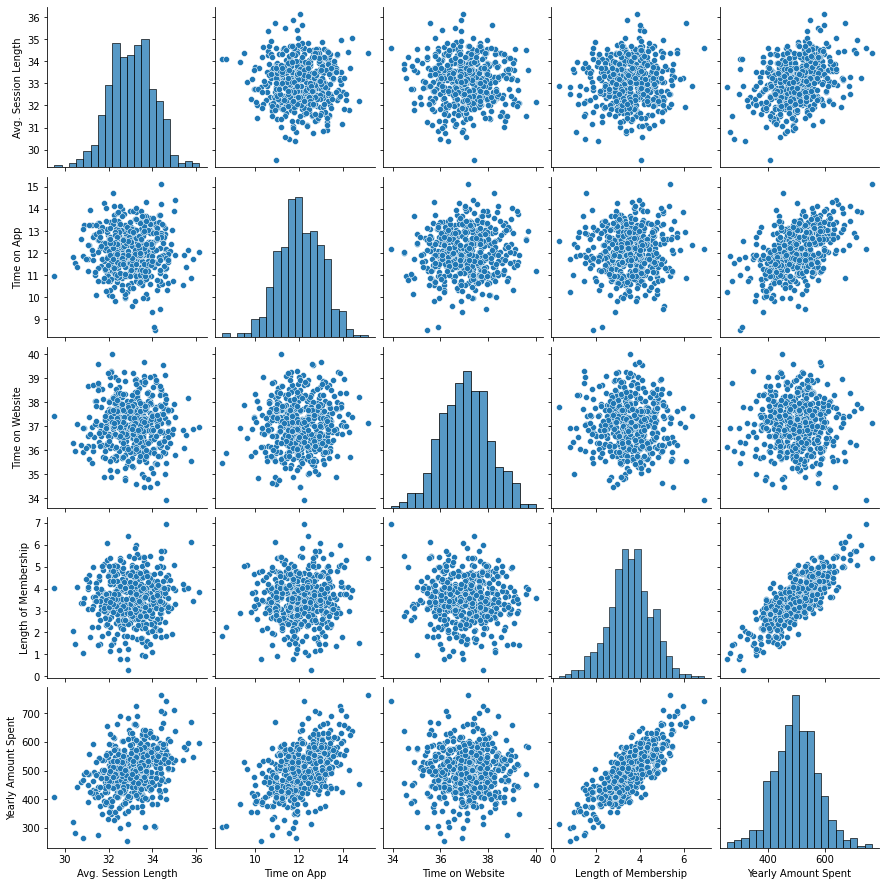

In [9]:
sns.pairplot(data)

## 파생 변수를 만들 경우, 새로운 상관관계가 생길 수 있다. (1차원적으로 생각하기보단, 다양한 방법으로 생각해봐야 함)
## 선형적으로 만들 수 있도록 여러 작업을 시도해봐야 한다. 

# 불필요한 칼럼 제거

In [12]:
data.drop(['Email', 'Address', 'Avatar'], axis = 1, inplace=True) ## 이메일, 주소, 닉네임을 지움

In [13]:
data.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505


# Train / Test 데이터 나누기

In [14]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.iloc[:, :4]

In [20]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [16]:
y = data['Yearly Amount Spent']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=100) 
##radom_state : 난수 발생 시, 시드를 안주면 매번 다른 데이터가 들어가게 됨
## train과 test의 특성이 너무 다르게 분배된 경우, random_state 파라미터를 수정한다.

# Linear Model 제작

In [23]:
import statsmodels.api as sm ## 공분산이나 통계 값을 눈에 보기 쉽게 제작

In [25]:
lm = sm.OLS(y_train, X_train).fit()  ## y를 먼저 넣는다.

In [26]:
lm.summary() ## 리포트가 깔끔하게 나온다. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.105e+04
Date:                 Thu, 15 Jul 2021   Prob (F-statistic):                        0.00
Time:                         16:36:37   Log-Likelihood:                         -1596.0
No. Observations:                  350   AIC:                                      3200.
Df Residuals:                      346   BIC:                                      3215.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.1440      0.930     13.062      0.000      10.315      13.973
Time on App             34.1355      1.212     28.168      0.000      31.752      36.519
Time on Website        -14.3109      0.868    -16.482      0.000     -16.019     -12.603
Length of Membership    61.2897      1.250     49.025      0.000      58.831      63.749
==============================================================================
Omnibus:                        0.331   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.454
Skew:                          -0.048   Prob(JB):                        0.797
Kurtosis:                       2.852   Cond. No.                         55.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 예측 평가

In [27]:
predictions = lm.predict(X_test) ## sklearn 이나 기타 모델들은 별도 평가를 제공하지 않는다. predict을 통해 진행해봐야한다. 

In [28]:
 predictions ## 예측값

69     417.904446
29     567.655141
471    535.668742
344    425.644960
54     474.949637
          ...    
308    625.574018
171    462.810969
457    527.178727
75     443.949278
311    488.476740
Length: 150, dtype: float64

In [29]:
y_test ## 실제값

69     451.575685
29     554.722084
471    541.049831
344    442.722892
54     522.404141
          ...    
308    604.841319
171    439.891280
457    534.771485
75     478.719357
311    506.132342
Name: Yearly Amount Spent, Length: 150, dtype: float64

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Yearly Amount Spent'>

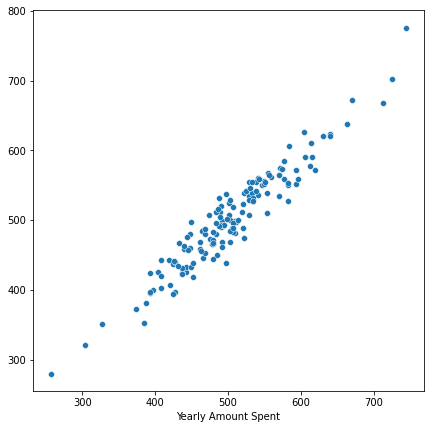

In [31]:
plt.figure(figsize = [7,7]) ##직사각형태로 봐야 명확한 구분이 가능함
sns.scatterplot(y_test, predictions) ##실제값과 예측값의 스캐터 시각화


In [32]:
from sklearn import metrics

In [34]:
print('MSE :',metrics.mean_squared_error(y_test, predictions)) 
## 차이를 확인할 때에는, MSE를 보는 것이 더 뚜렷하게 보일 수 있다. 
## 로그를 확인하기 위함. RMSE 대비, 더 큰 차이를 볼 수 있기 때문.

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 
##루트 MSE

## RMSE가 낮게 나오더라도, 바로 사용하는 것이 아니라 로지스틱 등 다양한 모델들을 적용하여, 가장 최적의 모델을 선정해야 한다. 
## 다양한 모델들을 비교할 필요가 있음

MSE : 473.2679612616088
RMSE : 21.754722734652557
